In [107]:
#import library yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
import json
from math import sqrt
from sklearn.metrics import mean_squared_error

In [125]:
#membuat fungsi LinearRegression
def LinearRegression(experience=None, graph=False, error=False):
  #Membuka file train.json sebagai traning data
  with open('train.json', 'r') as file:
    jsondata = file.read()
    datas = json.loads(jsondata)
    np.random.shuffle(datas)
    datas = np.array(datas);

    """
    salary = Y atau Variable Dependent
    age = X atau Variable Independent
    """

    totalDataTrain = int((len(datas) * 80) / 100)
    totalDataTest = int(len(datas) - totalDataTrain)

    # Data Test
    agetrain = np.array([data['age'] for data in datas[0:totalDataTrain]])
    salarytrain = np.array([data['salary'] for data in datas[0:totalDataTrain]])

    # Data Train
    agetest = np.array([data['age'] for data in datas[totalDataTrain:]])
    salarytest = np.array([data['salary'] for data in datas[totalDataTrain:]])

    #menghitung jumlah data dan total salary dan age
    sumSalary = sum(salarytrain)
    sumAge = sum(agetrain)

    #mencari Mean dari Salary dan Age
    meanAge = sumAge / totalDataTrain
    meanSalary = sumSalary / totalDataTrain

    #mencari range dari age dan salary berdasarkan mean dan menjumlahkan
    sumrangeAge = agetrain - meanAge
    sumrangeSalary = salarytrain - meanSalary

    #untuk menentukan slope dalam bentuk positif atau negatif
    b1 = (sum(sumrangeAge * sumrangeSalary)) / (sum(sumrangeAge ** 2))

    #menentukan titik mulai dari garis linear
    b0 = meanSalary - (b1 * meanAge)

    maxage = 0


    for x in agetrain:
      if x >= maxage:
        maxage = x;

    #menentukan titik ujung dari garis linear
    linearY = b0 + (b1 * maxage)

    if(graph):
      x = agetrain
      y = salarytrain

      x1 = np.array([0, meanAge, maxage]);
      y1 = np.array([b0, meanSalary, linearY])

      # Menentukan Garis Linear
      plt.plot(x1, y1);

      # Mempersebar data
      plt.scatter(x, y);
      plt.scatter(meanAge, meanSalary);
      plt.show()

    predictedsalary = np.array([b0 + b1 * x for x in agetest]);

    print(salarytrain, '\n')
    print(salarytest, '\n')

    if(error == True):
      SEE = sqrt((sum((predictedsalary - salarytest) ** 2) / (totalDataTest - 2)))
      print("SEE:", SEE)

      MAE = (sum(salarytest - predictedsalary)) / totalDataTest
      print("MAE:", MAE)

      MSE = sum((salarytest - predictedsalary) ** 2) / totalDataTest
      print("MSE:", MSE)

      RMSE = sqrt(((sum(salarytest - predictedsalary)) ** 2) / totalDataTest)
      print("RMSE:", RMSE)

      MAPE = (sum((predictedsalary - salarytest) / salarytest) * 100) / totalDataTest
      print("MAPE:", MAPE)

    if(experience != None):
      prediction = b0 + b1 * experience
      print(prediction)

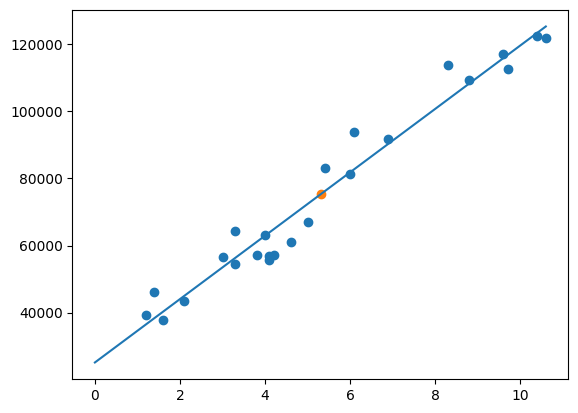

[ 83089.  64446.  46206.  57198.  56643.  56958.  55795.  93941. 122392.
 112636.  67030. 121873.  63219.  37732. 116970.  91739.  57082. 113813.
  54446.  43526.  39433.  81364. 109432.  61112.] 

[101303.  66030. 105583.  98274.  60151.  39892.] 

SEE: 7184.367825952084
MAE: -1560.9548857380723
MSE: 34410094.03905031
RMSE: 3823.542981562696
MAPE: 3.32744573060965


In [126]:
LinearRegression(graph=True, error=True)

In [103]:
LinearRegression(3.3)

[{'age': 5.0, 'salary': 67030.0} {'age': 10.4, 'salary': 122392.0}
 {'age': 8.0, 'salary': 101303.0} {'age': 3.3, 'salary': 54446.0}
 {'age': 3.0, 'salary': 56643.0} {'age': 9.7, 'salary': 112636.0}
 {'age': 1.2, 'salary': 39433.0} {'age': 4.6, 'salary': 61112.0}
 {'age': 3.8, 'salary': 57198.0} {'age': 4.0, 'salary': 63219.0}
 {'age': 6.9, 'salary': 91739.0} {'age': 3.3, 'salary': 64446.0}
 {'age': 2.1, 'salary': 43526.0} {'age': 3.1, 'salary': 60151.0}
 {'age': 5.4, 'salary': 83089.0} {'age': 9.6, 'salary': 116970.0}
 {'age': 6.0, 'salary': 81364.0} {'age': 6.1, 'salary': 93941.0}
 {'age': 4.2, 'salary': 57082.0} {'age': 4.1, 'salary': 55795.0}
 {'age': 5.2, 'salary': 66030.0} {'age': 2.3, 'salary': 39892.0}
 {'age': 8.8, 'salary': 109432.0} {'age': 1.6, 'salary': 37732.0}
 {'age': 10.6, 'salary': 121873.0} {'age': 8.3, 'salary': 113813.0}
 {'age': 4.1, 'salary': 56958.0} {'age': 1.4, 'salary': 46206.0}
 {'age': 9.1, 'salary': 105583.0} {'age': 7.2, 'salary': 98274.0}]
[ 67030. 12239